In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import GaussianNoise

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [4]:
noise = GaussianNoise(0.2)

In [5]:
noisy = noise(X_test[0:2], training = True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [6]:
encoder = Sequential()

encoder.add(Flatten(input_shape = [28,28]))
encoder.add(GaussianNoise(0.2))
# encoder.add(Dense(784, activation = 'relu'))
encoder.add(Dense(400, activation = 'relu'))
encoder.add(Dense(200, activation = 'relu'))
encoder.add(Dense(100, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))

In [7]:
decoder = Sequential()

# decoder.add(Dense(25, activation = 'relu'))
decoder.add(Dense(50, activation = 'relu'))
decoder.add(Dense(100, activation = 'relu'))
decoder.add(Dense(200, activation = 'relu'))
decoder.add(Dense(400, activation = 'relu'))
decoder.add(Dense(784, activation = 'sigmoid'))

decoder.add(Reshape([28,28]))

In [17]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

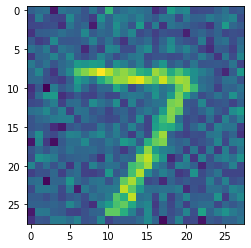

In [18]:
plt.imshow(noisy[0])

In [19]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test],)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 32s 535us/sample - loss: 0.1387 - accuracy: 0.8064 - val_loss: 0.1330 - val_accuracy: 0.8062
Epoch 2/5
60000/60000 [==============================] - 28s 468us/sample - loss: 0.1346 - accuracy: 0.8072 - val_loss: 0.1291 - val_accuracy: 0.8060
Epoch 3/5
60000/60000 [==============================] - 36s 597us/sample - loss: 0.1309 - accuracy: 0.8079 - val_loss: 0.1244 - val_accuracy: 0.8078
Epoch 4/5
60000/60000 [==============================] - 33s 549us/sample - loss: 0.1277 - accuracy: 0.8084 - val_loss: 0.1223 - val_accuracy: 0.8069
Epoch 5/5
60000/60000 [==============================] - 30s 506us/sample - loss: 0.1250 - accuracy: 0.8089 - val_loss: 0.1189 - val_accuracy: 0.8086


In [29]:
denoised = autoencoder(X_test[-1:])

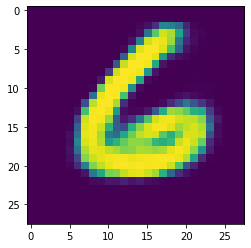

In [31]:
plt.imshow(denoised[-1])

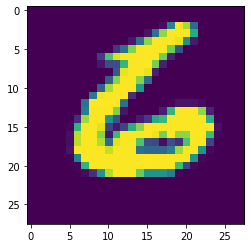

In [33]:
plt.imshow(X_test[-1])